# Decision Tree
#### Decision Trees are versatile Machine Learning algorithms that can perform both classification and regression tasks. They are very powerful algorithms, capable of fitting complex datasets.
The idea of is breaking down our data by making decisions based on asking a series of questions. Based on the features in our trainset, the model learns a series of questions to infer the class labels of the samples.

Using the decision algorithm, we start at the tree root and split the data on the feature that results in the largest **Information Gain (IG)**. In an iterative process, we can then repeat this splitting procedure at each child node until each leaf is pure i.e. samples at each node all belong to the same class.

## Maximizing information gain
In order to split the nodes at the most informative features, we need to define an objective function that we want to optimize via the tree learning algorithm. Here, our objective function is to maximize the information gain at each split, which we defne as follows:

### $IG\left( \mathbf{D}_p,f\right) =  I\left(\mathbf{D}_p\right)- \sum_{j=1}^m \frac{\mathbf{N}_j}{\mathbf{N}_p}I\left(\mathbf{D}_p\right)$

So it is evident that, the information gain is simply the difference between the __impurity__ of the parent node and the sum of the child node impurities — the lower the impurity of the child nodes, the larger the information gain.

Now, the 3 _impurity measures_ (or the _splitting criteria_) that are commonly used in binary decision trees are **Gini Index ($I_G$)**, **Entropy ($I_H$)**, and the **Classifcation Error ($I_E$)**.

## Entropy
### $I_H(t) = - \sum_{i=1}^c p{(i\:|\:t)}\:log_2\:p{(i\:|\:t)}$
Here, $p{(i\:|\:t)}$ is the proportion of the samples that belongs to class __c__ for a particular node __t__. The entropy is therefore 0 if all samples at a node belong to the same class, and the entropy is maximal if we have a uniform class distribution. 

For example, in a binary class setting, the entropy is 0 if $p{(i=1|t)}=1$ or $p{(i=0|t)}=0$. If the classes are distributed uniformly with $p{(i=1|t)}=0.5$ and $p{(i=0|t)}=0.5$ , the entropy is maximal (1). Therefore, we can say that the entropy criterion attempts to _maximize the __mutual information___ in the tree.

## Gini index
Gini index is a criterion to _minimize the probability of __misclassifcation___:
### $I_G(t) =1 - \sum_{i=1}^c p{(i\:|\:t)}^2$
Similar to entropy, the Gini index is maximal if the classes are uniformly mixed.

## Classifcation error
### $I_E = 1 - max{\{p(i\:|\:t)}\}$

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
df = pd.read_csv('kyphosis.csv')

## Data Exploration

#### Data Dictionary
Variable|Definition
------------ | -------------
Kyphosis|Whether or not the disease is present after the operation
Age| Age of the patient in months
Number| Number of vertebrates involved in the operation
Start|The topmost vertebrate that was operated on

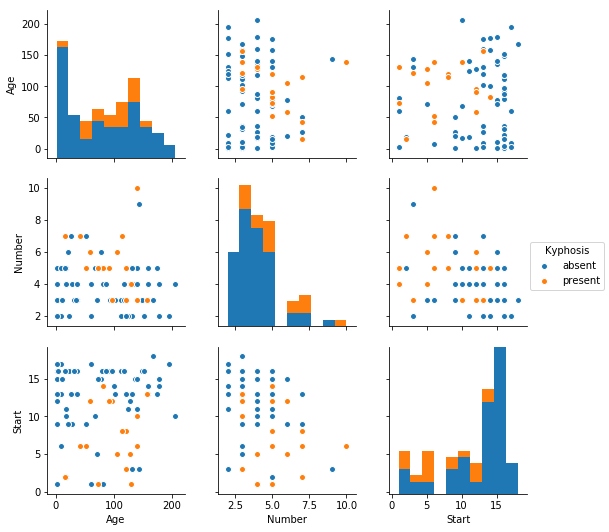

In [45]:
sns.pairplot(df,hue='Kyphosis')

## Building the Model


### Creating features and Labels

In [46]:
X = df.drop('Kyphosis',axis=1)

In [47]:
y= df['Kyphosis']

### Preprocessing/Scaling
One of the many qualities of Decision Trees is that they require very little data preparation. In particular, they don’t require feature scaling or centering at all.

### Splitting the dataset
While experimenting with any learning algorithm, it is important not to test the prediction of an estimator on the data used to fit the estimator as this would not be evaluating the performance of the estimator on new data. This is why datasets are often split into train and test data.
#### A random permutation, to split the data randomly
```python
np.random.seed(42)
indices = np.random.permutation(len(X))
X_train = X[indices[:-20]]
y_train = y[indices[:-20]]
X_test = X[indices[-20:]]
y_test = y[indices[-20:]]
```
#### But we will use the `train_test_split` function from `sklearn.model_selection`

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3,random_state=42)

### Importing the Model

In [50]:
from sklearn.tree import DecisionTreeClassifier

### Create and fit a    Classifier

In [51]:
dt_clf = DecisionTreeClassifier(max_depth=3)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Predictions

In [52]:

pred = dt_clf.predict(X_test)

## Evaluation

In [53]:
from sklearn.metrics import classification_report, confusion_matrix

In [54]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[18  1]
 [ 5  1]]
             precision    recall  f1-score   support

     absent       0.78      0.95      0.86        19
    present       0.50      0.17      0.25         6

avg / total       0.71      0.76      0.71        25



## Visualizing the Decision Tree

In [61]:
kyph_features = list(df.drop('Kyphosis',axis=1).columns)
kyph_class = np.array(df['Kyphosis'])[-2:]

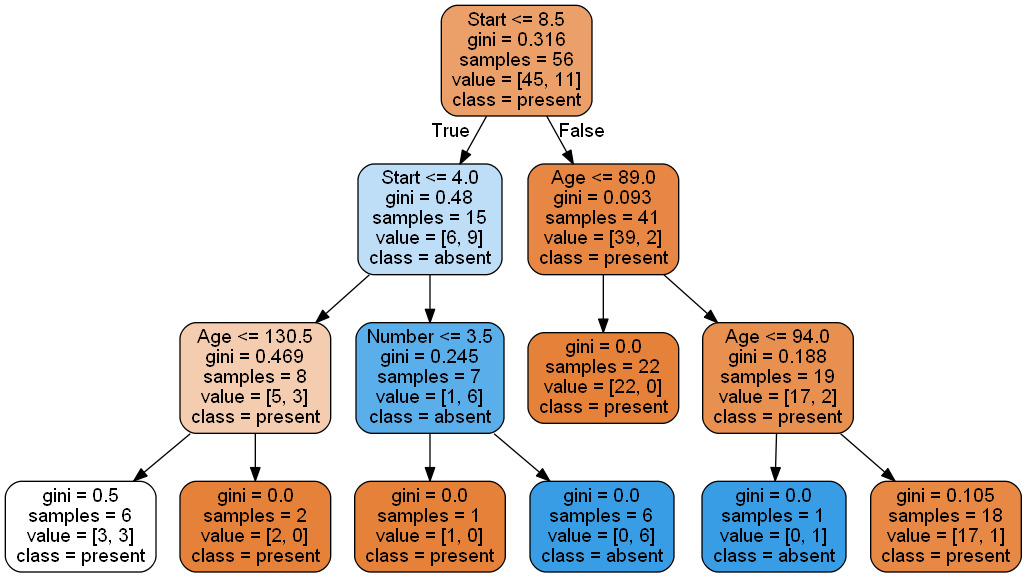

In [63]:
from IPython.display import Image
from sklearn.externals.six import StringIO
import pydot
from sklearn.tree import export_graphviz

dot_data = StringIO()
export_graphviz(
    dt_clf,
    out_file=dot_data,
    feature_names=kyph_features,
    class_names=kyph_class,
    rounded=True,
    filled=True
)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

We also could have Converted the .dot file to a PNG using the dot commandline tool from the graphviz package. It is done with the following command...

**`dot -Tpng kyphoviz.dot -o kyphoviz.png`**

# Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier

# Working with Iris dataset

In [58]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data # petal length and width
y = iris.target
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=3)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

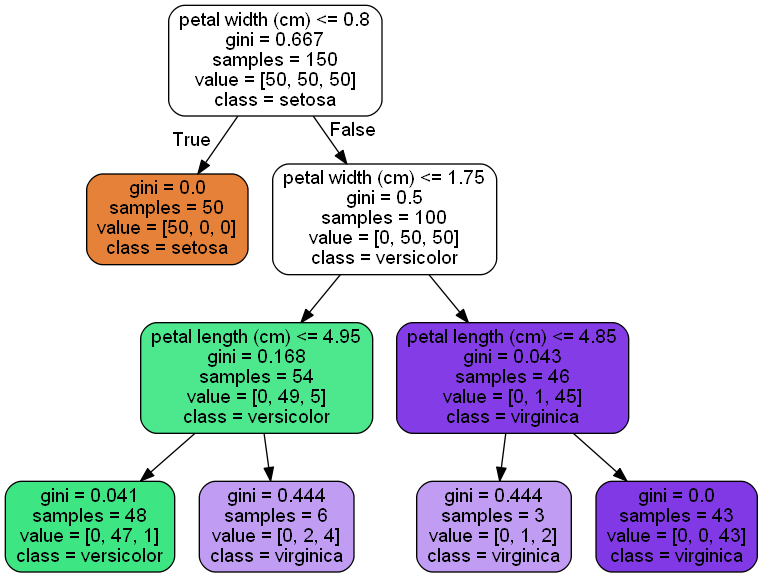

In [64]:
dot_data = StringIO()
export_graphviz(
    tree_clf,
    out_file=dot_data,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    rounded=True,
    filled=True
)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())